# Spam Detection using Naive Bayes














In [1]:
import os
import numpy as np
import pandas as pd
import nltk
import string
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
f1 = open('SMSSpamCollection')


# Convert f1 into DataFrame

In [3]:
# Make Data Frame


#Make df for raw data
arr = np.empty((0,2)) 
for line in f1:
    l = len(line)-1
    if line[0] == 'h':
        text1 = 0
        text2 = line[4:l]
        arr = np.append(arr, np.array([[text2 , text1]]) , axis = 0)  
      
    else :
        text1 = 1
        text2 = line[5:l]
        arr = np.append(arr, np.array([[text2 , text1]]) , axis = 0)  


In [4]:
col = ["email" , "spam"]
df =  pd.DataFrame(data = arr , columns = col)
df['spam'] = df['spam'].apply(lambda x: ord(x) - ord('0'))


print(df)

                                                  email  spam
0     Go until jurong point, crazy.. Available only ...     0
1                         Ok lar... Joking wif u oni...     0
2     Free entry in 2 a wkly comp to win FA Cup fina...     1
3     U dun say so early hor... U c already then say...     0
4     Nah I don't think he goes to usf, he lives aro...     0
...                                                 ...   ...
5569  This is the 2nd time we have tried 2 contact u...     1
5570              Will Ã¼ b going to esplanade fr home?     0
5571  Pity, * was in mood for that. So...any other s...     0
5572  The guy did some bitching but I acted like i'd...     0
5573                         Rofl. Its true to its name     0

[5574 rows x 2 columns]


In [5]:
df.shape

(5574, 2)

In [6]:
df.columns

Index(['email', 'spam'], dtype='object')

Number of spam emails :  747
Number of ham emails  :  4827


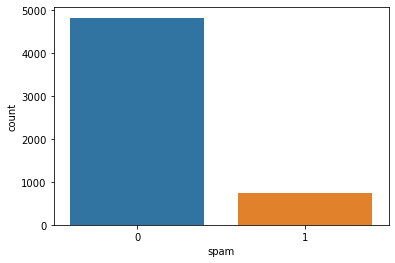

In [7]:
print("Number of spam emails : " ,df[df['spam'] == 1].shape[0])
print("Number of ham emails  : ",df[df['spam'] == 0].shape[0])


sns.countplot(x = 'spam' , data = df)
plt.show()

# Over Sampling
 
### To make the dataset balance 

## 








In [8]:
file1 = pd.read_csv('spam_or_not_spam.csv')
file1 = file1[file1['label'] == 1]
file1.columns=['email','spam']

file1

,email,spam
2500,save up to NUMBER on life insurance why spend...,1
2501,NUMBER fight the risk of cancer URL NUMBER sli...,1
2502,NUMBER fight the risk of cancer URL NUMBER sli...,1
2503,adult club offers free membership instant acc...,1
2504,i thought you might like these NUMBER slim dow...,1
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [9]:
file2 = pd.read_csv('spam_ham_dataset.csv')
file2.drop(['Unnamed: 0','label'], axis =1,inplace = True)
file2.columns=['email','spam']
file2 = file2[file2['spam'] == 1]
file2['email']= file2['email'].apply(lambda str : str[9:])

file2

,email,spam
3,"photoshop , windows , office . cheap . main tr...",1
7,looking for medication ? we ` re the best sour...,1
10,vocable % rnd - word asceticism\r\nvcsc - bran...,1
11,report 01405 !\r\nwffur attion brom est inst s...,1
13,vic . odin n ^ ow\r\nberne hotbox carnal bride...,1
...,...,...
5159,pictures\r\nstreamlined denizen ajar chased\r\...,1
5161,penny stocks are about timing\r\nnomad interna...,1
5162,anomaly boys from 3881\r\nuosda apaproved mled...,1
5164,slutty milf wants to meet you\r\ntake that !\r...,1


In [10]:
df=pd.concat([df,file1,file2],axis=0)
df

,email,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5159,pictures\r\nstreamlined denizen ajar chased\r\...,1
5161,penny stocks are about timing\r\nnomad interna...,1
5162,anomaly boys from 3881\r\nuosda apaproved mled...,1
5164,slutty milf wants to meet you\r\ntake that !\r...,1


Number of spam emails :  2746
Number of ham emails  :  4827


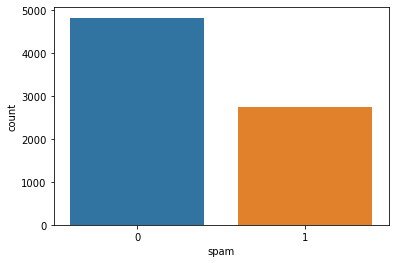

In [11]:
print("Number of spam emails : " ,df[df['spam'] == 1].shape[0])
print("Number of ham emails  : ",df[df['spam'] == 0].shape[0])


sns.countplot(x = 'spam' , data = df)
plt.show()

# Check Duplicates

In [12]:
df.drop_duplicates(inplace = True)

#New shape of the df
df.shape


(7061, 2)

In [13]:
df

,email,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5159,pictures\r\nstreamlined denizen ajar chased\r\...,1
5161,penny stocks are about timing\r\nnomad interna...,1
5162,anomaly boys from 3881\r\nuosda apaproved mled...,1
5164,slutty milf wants to meet you\r\ntake that !\r...,1


In [14]:
df.reset_index(inplace=True)

In [15]:
df.drop('index',axis=1,inplace=True)

df

,email,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
7056,pictures\r\nstreamlined denizen ajar chased\r\...,1
7057,penny stocks are about timing\r\nnomad interna...,1
7058,anomaly boys from 3881\r\nuosda apaproved mled...,1
7059,slutty milf wants to meet you\r\ntake that !\r...,1


# Check for Missing values

In [16]:
# Check for Missing data (NAN,na,NaN) for each column
df.isnull().sum()

email    1
spam     0
dtype: int64

In [17]:
df = df.dropna()

df

,email,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
7056,pictures\r\nstreamlined denizen ajar chased\r\...,1
7057,penny stocks are about timing\r\nnomad interna...,1
7058,anomaly boys from 3881\r\nuosda apaproved mled...,1
7059,slutty milf wants to meet you\r\ntake that !\r...,1


# Processing and Tokenization

In [18]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

ps = PorterStemmer()

In [19]:
def process_email(email):

    #1 remove punctuations
    nopunct = [char for char in email if char not in string.punctuation]
    nopunct = ''.join(nopunct)#List to string 
    
    #2 convert into lower case
    nopunct = nopunct.lower()
    
    #3 remove stopwords and tokenization
    clean_words = [word for word in nopunct.split() if word not in stopwords.words('english')]
    
    #4 stemming
    for i in range(len(clean_words)):
        clean_words[i] = ps.stem(clean_words[i])
       
    return clean_words

In [20]:
print("Number of spam emails : " ,df[df['spam'] == 1].shape[0])
print("Number of ham emails  : ",df[df['spam'] == 0].shape[0])

Number of spam emails :  2542
Number of ham emails  :  4518


## Making Vocabulary of words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=process_email)
vocab = vectorizer.fit_transform(df['email'])
    

In [22]:
print(vocab)
print(type(vocab))

  (0, 17249)	1
  (0, 21746)	1
  (0, 31016)	1
  (0, 10567)	1
  (0, 4915)	1
  (0, 7340)	1
  (0, 26394)	1
  (0, 17562)	1
  (0, 42775)	1
  (0, 22738)	1
  (0, 13221)	1
  (0, 7331)	1
  (0, 9070)	1
  (0, 17407)	1
  (0, 3703)	1
  (0, 41889)	1
  (1, 28814)	1
  (1, 22872)	1
  (1, 21538)	1
  (1, 42393)	1
  (1, 39813)	1
  (1, 28965)	1
  (2, 16102)	1
  (2, 14046)	2
  (2, 768)	1
  :	:
  (7059, 3358)	1
  (7059, 9754)	2
  (7059, 41861)	1
  (7059, 13014)	1
  (7059, 28976)	6
  (7059, 16080)	1
  (7059, 20515)	1
  (7059, 10113)	2
  (7059, 15428)	1
  (7059, 20854)	1
  (7059, 9739)	1
  (7059, 34447)	1
  (7059, 19741)	1
  (7059, 27270)	1
  (7059, 31824)	1
  (7059, 5699)	1
  (7059, 14910)	1
  (7059, 33147)	1
  (7059, 4749)	1
  (7059, 20458)	1
  (7059, 20529)	1
  (7059, 20423)	1
  (7059, 37605)	1
  (7059, 9131)	3
  (7059, 8671)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [23]:
vocab.shape

(7060, 45280)

In [24]:
print(vocab.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Naive Bayes Classifier

In [25]:
class NaiveBayesClassifier :
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.X_filtered1 = self.X_train[self.y_train == 1]
        self.X_filtered0 = self.X_train[self.y_train == 0]
        self.sum_all1 = np.sum(self.X_filtered1[:,:])
        self.sum_all0 = np.sum(self.X_filtered0[:,:])
            
    #label => spam/ham
    def prior_prob(self, label):
        total = self.X_train.shape[0]
        label_total = np.sum(self.y_train == label)
        return label_total/total
    
    #Conditional probability P(Xi/label)
    def conditional_prob(self, col_name, col_value, label):
        if label == 1 :
            X_filtered = self.X_filtered1
            numerator = np.sum(X_filtered[:, col_name]) + 1
            denominator = self.sum_all1 + self.X_train.shape[1]
        else:
            X_filtered = self.X_filtered0
            numerator = np.sum(X_filtered[:, col_name]) + 1
            denominator = self.sum_all0 + self.X_train.shape[1]
        
        return float(float(numerator)/float(denominator))
    
    
    def predict(self, X_test):
        
        row = X_test.shape[0]
        col = X_test.shape[1]
        pp1 = self.prior_prob(1)
        pp0 = self.prior_prob(0)
        
        pred = []
        
        for i in range(row):
            s_prob =1.0
            ns_prob =1.0
            #print(i,end=" ")
            
            for j in range(col):
                if X_test[i][j] > 0:
                    s_prob = s_prob*self.conditional_prob(j , X_test[i][j],1);
                    ns_prob =ns_prob*self.conditional_prob(j , X_test[i][j],0);
                
            s_prob= s_prob*pp1
            ns_prob = ns_prob*pp0
            #print(s_prob , ns_prob)
            if s_prob>ns_prob :
                pred.append(1)
            else :
                pred.append(0)
        return pred

    

## Performance Measures Functions

In [26]:
def confusion_mat(Y_test, pred):
    TN = 0
    TP=0
    FN=0
    FP=0
    

    for i in range(len(Y_test)):
        
        if pred[i] == 0 and Y_test[i] == 0:
            TN=TN+1
        elif pred[i] == 1 and Y_test[i] == 1:
            TP=TP+1
        elif pred[i] == 1 and Y_test[i] == 0:
            FP=FP+1
        else:
            FN=FN+1
    
    return TN,TP,FN,FP
       

In [27]:
def accuracy_score(TN,TP,FN,FP):
    total = TN+TP+FN+FP
    return (TN+TP)/total


def precision_score(TN,TP,FN,FP):
    return TP/(TP+FP)


def recall_score(TN,TP,FN,FP):
    return TP/(TP+FN)


def f0pt5_score(TN,TP,FN,FP):
    p = TP/(TP+FP)
    r = TP/(TP+FN)
    return  5*p*r/(p+r)



# VALIDATION TECHNIQUES



## Hold Out Validation

In [28]:
# splitting in 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(vocab, df['spam'], test_size=0.20, random_state = 0)

In [29]:
X_test = X_test.toarray()
X_train = X_train.toarray()

Y_test = np.array([int(i) for i in Y_test])
Y_train = np.array([int(i) for i in Y_train])

# Y_test = Y_test.reset_index()
# Y_train = Y_train.reset_index()

In [30]:
print(type(X_test))
print(type(X_train))
print(type(Y_test))
print(type(Y_train))


print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

print(X_test)
print('------------------------------------------')
print(Y_train)
print(Y_test)
# print(X_train)
#print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1412, 45280)
(1412,)
(5648, 45280)
(5648,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------------------------------------
[1 0 0 ... 0 1 1]
[0 1 0 ... 0 0 0]


In [31]:
classifier = NaiveBayesClassifier()
classifier.fit(X_train , Y_train)

pred = classifier.predict(X_test)

print(pred)
type(pred)



[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 

list

### Performance Measures for Train Test Split 

In [32]:
#CONFUSION MATRIX
TN,TP,FN,FP = confusion_mat(Y_test,pred)

print("TN ", TN)
print("FP ", FP)
print("FN ", FN)
print("TP ", TP)


TN  849
FP  61
FN  174
TP  328


In [33]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))


ACCURACY   :  0.8335694050991501
PRECISION  :  0.8431876606683805
RECALL     :  0.6533864541832669
F0.5_SCORE :  1.840628507295174


## Stratified K fold Cross Validation

In [34]:
X=vocab
Y=df['spam'].values

Y = np.array([int(i) for i in Y])

In [35]:
accuracy = []
precision = []
recall = []
f0pt5 = []
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits =10, random_state = None)
skf.get_n_splits(X ,Y)

for train_index, test_index in skf.split(vocab , df['spam'].values):
    
    X1_train , X1_test = X[train_index], X[test_index]
    y1_train , y1_test = Y[train_index], Y[test_index]
    
 
    X1_test=X1_test.toarray()
    X1_train = X1_train.toarray()
    
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    
    TN,TP,FN,FP = confusion_mat(y1_test,prediction)
    
    print("TN ", TN , " TP " , TP , " FN " , FN , " FP ", FP)  

    accuracy.append(accuracy_score(TN,TP,FN,FP))
  
    precision.append(precision_score(TN,TP,FN,FP))

    recall.append(recall_score(TN,TP,FN,FP))

    f0pt5.append(f0pt5_score(TN,TP,FN,FP))
    

TN  428  TP  175  FN  79  FP  24
TN  426  TP  183  FN  71  FP  26
TN  431  TP  195  FN  59  FP  21
TN  432  TP  142  FN  112  FP  20
TN  422  TP  142  FN  112  FP  30
TN  432  TP  149  FN  105  FP  20
TN  419  TP  149  FN  105  FP  33
TN  422  TP  144  FN  110  FP  30
TN  418  TP  136  FN  119  FP  33
TN  423  TP  138  FN  117  FP  28


### Performance Measures of Stratified K fold validation

In [36]:
print("ACCURACIES  : ",accuracy)
print("PRECISIONS  : ",precision)
print("RECALL      : ",recall)
print("F0.5_SCORE  : ",f0pt5)

ACCURACIES  :  [0.8541076487252125, 0.8626062322946175, 0.886685552407932, 0.8130311614730878, 0.7988668555240793, 0.8229461756373938, 0.8045325779036827, 0.8016997167138811, 0.7847025495750708, 0.7946175637393768]
PRECISIONS  :  [0.8793969849246231, 0.8755980861244019, 0.9027777777777778, 0.8765432098765432, 0.8255813953488372, 0.8816568047337278, 0.8186813186813187, 0.8275862068965517, 0.8047337278106509, 0.8313253012048193]
RECALL      :  [0.6889763779527559, 0.7204724409448819, 0.7677165354330708, 0.5590551181102362, 0.5590551181102362, 0.5866141732283464, 0.5866141732283464, 0.5669291338582677, 0.5333333333333333, 0.5411764705882353]
F0.5_SCORE  :  [1.9315673289183224, 1.9762419006479484, 2.0744680851063833, 1.7067307692307692, 1.6666666666666667, 1.7612293144208038, 1.708715596330275, 1.6822429906542056, 1.6037735849056602, 1.6389548693586697]


In [37]:
from statistics import mean 

print("ACCURACY    : ",mean(accuracy))
print("PRECISION   : ",mean(precision))
print("RECALL      : ",mean(recall))
print("F0.5_SCORE  : ",mean(f0pt5))

ACCURACY    :  0.8223796033994334
PRECISION   :  0.8523880813379252
RECALL      :  0.610994287478771
F0.5_SCORE  :  1.7750591106239704


## LOGISTIC REGRESSION


In [38]:
X=vocab
Y=df['spam'].values

Y = np.array([int(i) for i in Y])

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

accuracy = []
precision = []
recall = []
f0pt5 = []

skf = StratifiedKFold(n_splits =10, random_state = None)
skf.get_n_splits(X ,Y)

for train_index, test_index in skf.split(vocab , df['spam'].values):
    
    X1_train , X1_test = X[train_index], X[test_index]
    y1_train , y1_test = Y[train_index], Y[test_index]
    
 
    X1_test=X1_test.toarray()
    X1_train = X1_train.toarray()
    
    lr.fit(X1_train,y1_train)
    prediction = lr.predict(X1_test)
    
    TN,TP,FN,FP = confusion_mat(y1_test,prediction)
    
    print("TN ", TN , " TP " , TP , " FN " , FN , " FP ", FP)  

    accuracy.append(accuracy_score(TN,TP,FN,FP))
  
    precision.append(precision_score(TN,TP,FN,FP))

    recall.append(recall_score(TN,TP,FN,FP))

    f0pt5.append(f0pt5_score(TN,TP,FN,FP))
    

TN  448  TP  211  FN  43  FP  4
TN  451  TP  209  FN  45  FP  1
TN  448  TP  230  FN  24  FP  4
TN  452  TP  243  FN  11  FP  0
TN  448  TP  218  FN  36  FP  4
TN  449  TP  221  FN  33  FP  3
TN  450  TP  220  FN  34  FP  2
TN  452  TP  229  FN  25  FP  0
TN  448  TP  224  FN  31  FP  3
TN  450  TP  219  FN  36  FP  1


In [39]:
# Mean Performance measures for Logistic regression

print("ACCURACY    : ",mean(accuracy))
print("PRECISION   : ",mean(precision))
print("RECALL      : ",mean(recall))
print("F0.5_SCORE  : ",mean(f0pt5))

ACCURACY    :  0.9518413597733711
PRECISION   :  0.9901358229235112
RECALL      :  0.8749065925582832
F0.5_SCORE  :  2.3214918350032323


## RANDOM DECISION FOREST

In [40]:
X=vocab
Y=df['spam'].values

Y = np.array([int(i) for i in Y])

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=70,random_state=3)

accuracy = []
precision = []
recall = []
f0pt5 = []

skf = StratifiedKFold(n_splits =10, random_state = None)
skf.get_n_splits(X ,Y)

for train_index, test_index in skf.split(vocab , df['spam'].values):
    
    X1_train , X1_test = X[train_index], X[test_index]
    y1_train , y1_test = Y[train_index], Y[test_index]
    
 
    X1_test=X1_test.toarray()
    X1_train = X1_train.toarray()
    
    rf.fit(X1_train,y1_train)
    prediction = rf.predict(X1_test)
    
    TN,TP,FN,FP = confusion_mat(y1_test,prediction)
    
    print("TN ", TN , " TP " , TP , " FN " , FN , " FP ", FP)  

    accuracy.append(accuracy_score(TN,TP,FN,FP))
  
    precision.append(precision_score(TN,TP,FN,FP))

    recall.append(recall_score(TN,TP,FN,FP))

    f0pt5.append(f0pt5_score(TN,TP,FN,FP))

TN  452  TP  136  FN  118  FP  0
TN  452  TP  144  FN  110  FP  0
TN  452  TP  191  FN  63  FP  0
TN  452  TP  233  FN  21  FP  0
TN  450  TP  198  FN  56  FP  2
TN  452  TP  197  FN  57  FP  0
TN  452  TP  196  FN  58  FP  0
TN  452  TP  197  FN  57  FP  0
TN  451  TP  193  FN  62  FP  0
TN  451  TP  195  FN  60  FP  0


In [41]:
# Mean Performance for Random Decision Forest

print("ACCURACY    : ",mean(accuracy))
print("PRECISION   : ",mean(precision))
print("RECALL      : ",mean(recall))
print("F0.5_SCORE  : ",mean(f0pt5))

ACCURACY    :  0.9059490084985836
PRECISION   :  0.999
RECALL      :  0.7395584375482476
F0.5_SCORE  :  2.113804950581962


## SUPPORT VECTOR MACHINE

In [47]:
# splitting in 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(vocab, df['spam'], test_size=0.20, random_state = 0)

In [48]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [49]:
X_test = X_test.toarray()
X_train = X_train.toarray()

Y_test = np.array([int(i) for i in Y_test])
Y_train = np.array([int(i) for i in Y_train])

print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(1412, 45280)
(1412,)
(5648, 45280)
(5648,)


In [50]:
from sklearn.svm import SVC
model = SVC()

In [51]:
model.fit(X_train, Y_train)

SVC()

In [52]:
prediction = model.predict(X1_test)
    
TN,TP,FN,FP = confusion_mat(y1_test,prediction)

print("TN ", TN , " TP " , TP , " FN " , FN , " FP ", FP) 

TN  451  TP  214  FN  41  FP  0


In [53]:
print("ACCURACY   : ",accuracy_score(TN,TP,FN,FP))
print("PRECISION  : ",precision_score(TN,TP,FN,FP))
print("RECALL     : ",recall_score(TN,TP,FN,FP))
print("F0.5_SCORE : ",f0pt5_score(TN,TP,FN,FP))


ACCURACY   :  0.9419263456090652
PRECISION  :  1.0
RECALL     :  0.8392156862745098
F0.5_SCORE :  2.281449893390192
